<a href="https://colab.research.google.com/github/Swamy612/Insurance-Premium-Prediction/blob/main/INSURANCE_PREMIUM_PREDICTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Insurance Premium Predictions**

In [ ]:
# DATASET - https://drive.google.com/file/d/1r-bS1ovwEUOUe3QEmdonJ8TFIgRrHTeT/view?usp=drive_link

In [ ]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_excel('/content/drive/MyDrive/insurance.xlsx')

# data sample
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


DATA DICTIONARY:

* age - how old the person is

* sex - male or female

* bmi - body weight level (fat/thin measure)

* children - number of kids

* smoker – does the person smoke (yes/no)

* region – where the person lives

* charges – insurance money to pay

Today we will explore a data set dedicated to the cost of treatment of different patients.  The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.
In any case, I wish you to be healthy!
Let's look at our data.

![![image.png](attachment:image.png)](https://www.hipwee.com/wp-content/uploads/2017/02/hipwee-healthy2-1170x612-640x335.jpg)

In [ ]:
# data dimensions
data.shape

(1338, 7)

In [ ]:
# missing value analysis
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# data sample
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# understand the categorical column
for cols in data.columns:
    if data[cols].dtype == 'O':
        print(cols, ':',  data[cols].unique())

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# mapping the required categorical columns
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

In [ ]:
# data sample
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


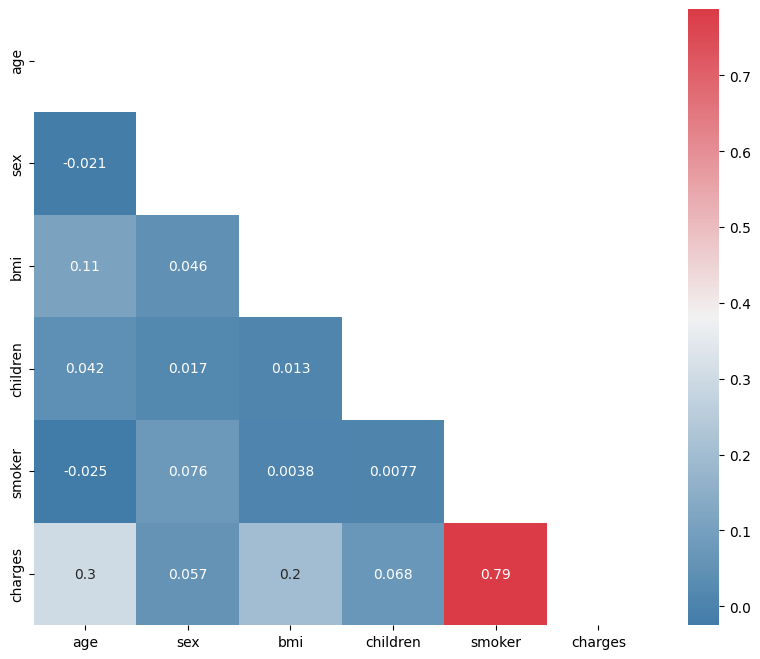

In [ ]:
# heatmap for correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True,
            mask = np.triu(corr),
            cmap = sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

* There is a strong correlation for patients who are smokers.
* The expectation was the corrrelation between BMI and the charges

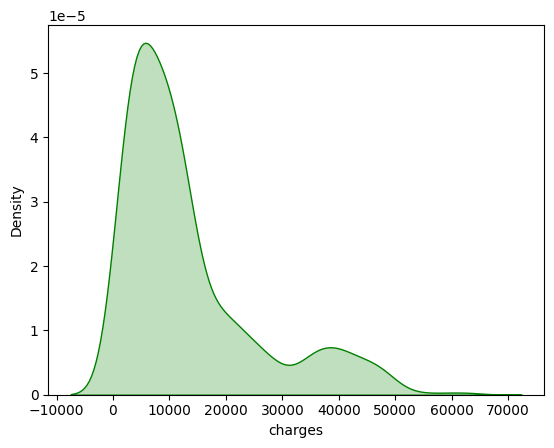

In [ ]:
# understand the target column
sns.kdeplot(data['charges'], fill=True, color='green')   # kernal density estimate
plt.show()

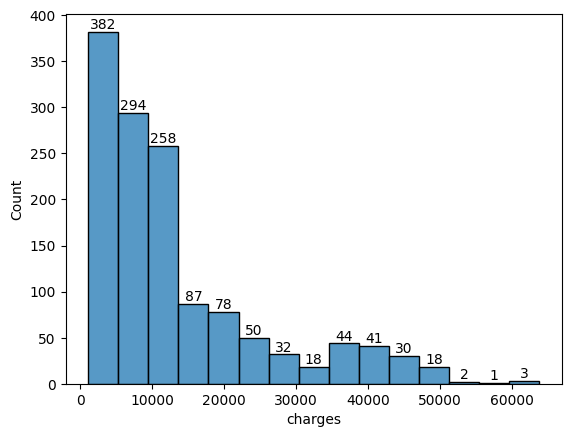

In [ ]:
# histogram
ax = sns.histplot(data['charges'], bins=15)
ax.bar_label(ax.containers[0])
plt.show()

* I plotted a histogram of insurance charges to see how many customers fall into different premium ranges.
* Most pay moderate premiums, with fewer customers paying very high amounts.

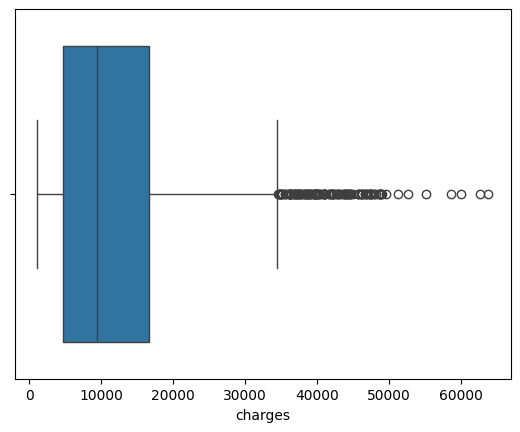

In [ ]:
# outlier plot
sns.boxplot(data['charges'], orient='h')
plt.show()

* I used a boxplot to check for outliers in insurance charges.
* It shows a few customers with very high premiums, likely due to high-risk factors like smoking or high BMI.

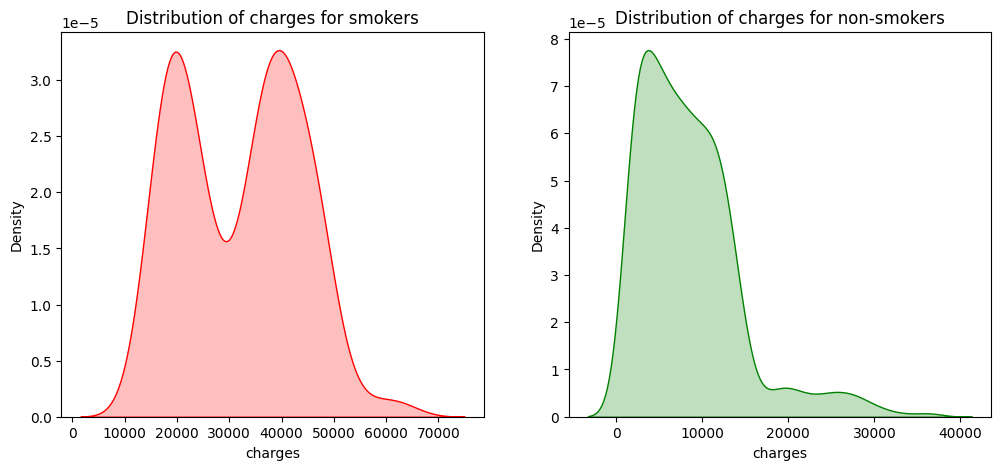

In [ ]:
# distribution of data for smoker column
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)   # 1 row 2 columns and plot in 1st plot
sns.kdeplot(data[data['smoker']==1]['charges'], color='red', fill=True, ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = fig.add_subplot(122)   # 1 row 2 columns and plot in 2nd plot
sns.kdeplot(data[data['smoker']==0]['charges'], color='green', fill=True, ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

* I plotted the distribution of insurance charges separately for smokers and non-smokers.

* Smokers clearly pay much higher premiums than non-smokers.
This confirms that smoker is the most important factor affecting insurance charges.”

Smoking patients tends to spend more on treatments

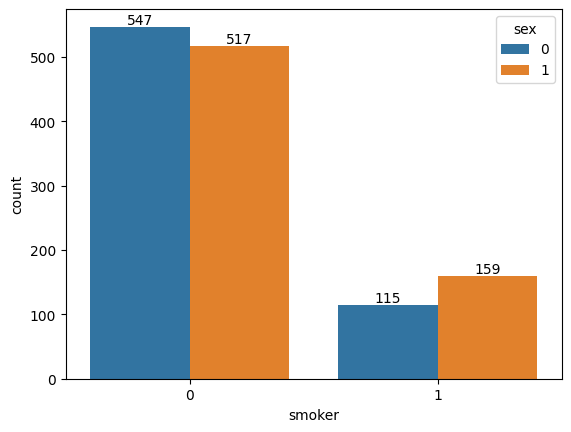

In [ ]:
# count of smokers and non-smokers wrt gender
ax = sns.countplot(x='smoker', hue='sex', data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

* This chart shows that Male smokers are more than Female smokers

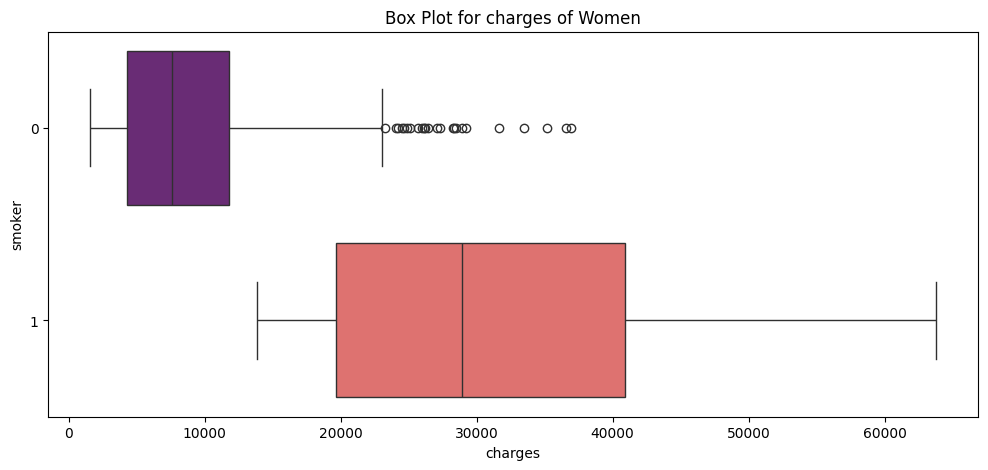

In [ ]:
# boxplot to understand the charges for female wrt smoking habit
plt.figure(figsize=(12, 5))
plt.title('Box Plot for charges of Women')
sns.boxplot(y='smoker', x='charges', data=data[data['sex']==0], orient='h', palette='magma')
plt.show()

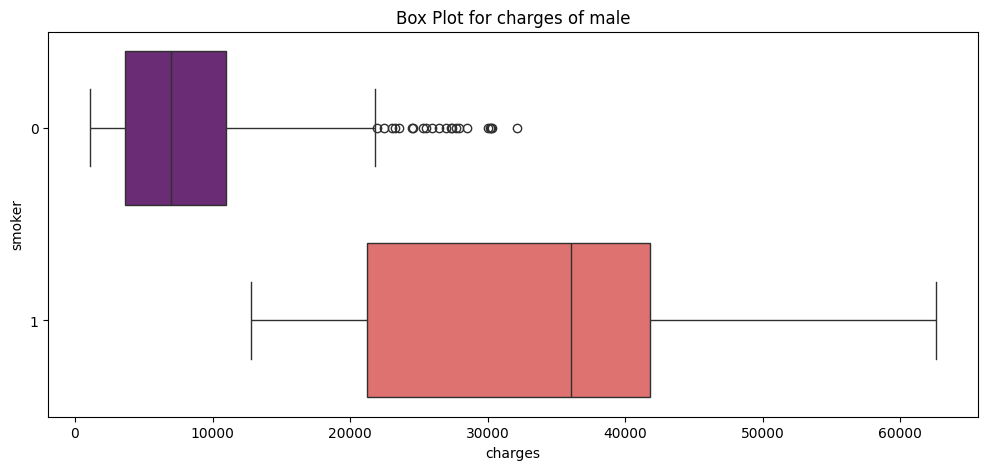

In [ ]:
# boxplot to understand the charges for male wrt smoking habit
plt.figure(figsize=(12, 5))
plt.title('Box Plot for charges of male')
sns.boxplot(y='smoker', x='charges', data=data[data['sex']==1], orient='h', palette='magma')
plt.show()

* Overall, smokers pay much higher premiums than non-smokers,
* and this pattern is consistent for both males and females, confirming smoking as a key factor in premium calculation.

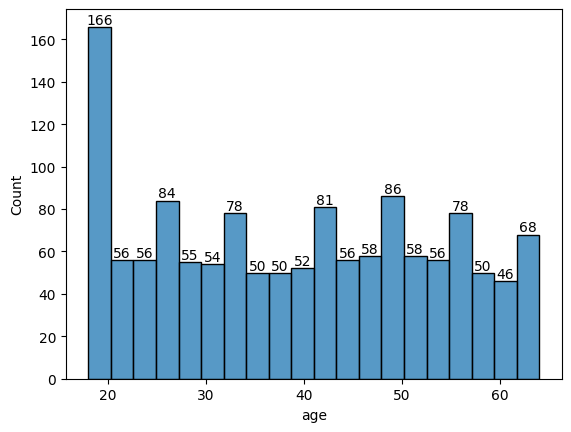

In [ ]:
# Understand the age of patients
ax = sns.histplot(data['age'], bins=20)
ax.bar_label(ax.containers[0])
plt.show()

* From this plot, we observe that most customers are middle-aged, and fewer are very young or very old.

* Since insurance risk increases with age, older customers generally tend to have higher insurance charges.”

In [ ]:
# understanding the age column
data[data['age'] <=20 ]['age'].value_counts()

,count
age,
18,69
19,68
20,29


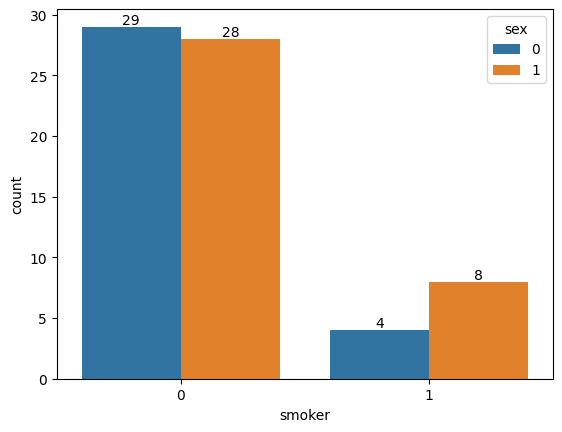

In [ ]:
# understanding the smoking habit of people with age 18
ax = sns.countplot(x='smoker', hue='sex', data=data[data['age'] == 18])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

*  smoking behave at minimal ages especially at 18

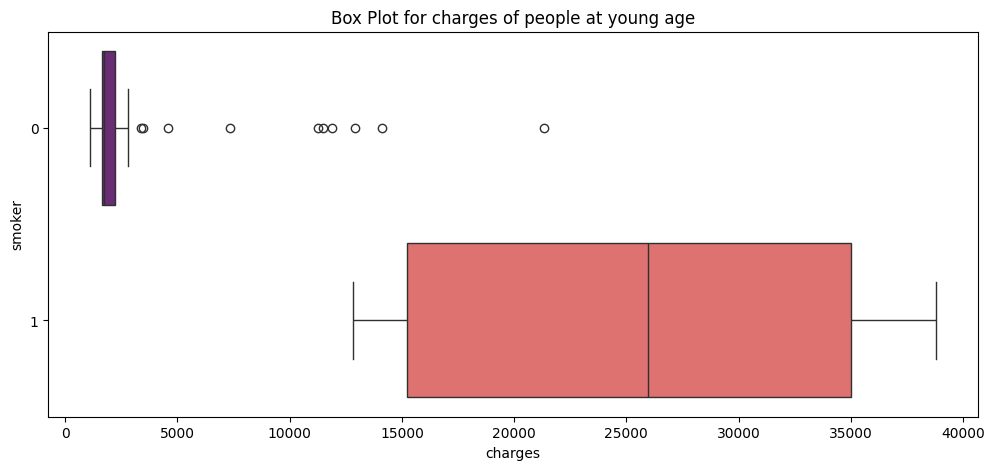

In [ ]:
# Does the smnoking habit in young agehas effect on their treatment cost ?
plt.figure(figsize=(12, 5))
plt.title('Box Plot for charges of people at young age')
sns.boxplot(y='smoker', x='charges', data=data[data['age']==18], orient='h', palette='magma')
plt.show()

 *  Even at a young age, smokers have higher medical costs than non-smokers, showing that smoking increases treatment cost regardless of age.”

In [ ]:
# understanding the count of people with maximum age
data[data['age'] == data['age'].max()]['age'].value_counts()

,count
age,
64,22


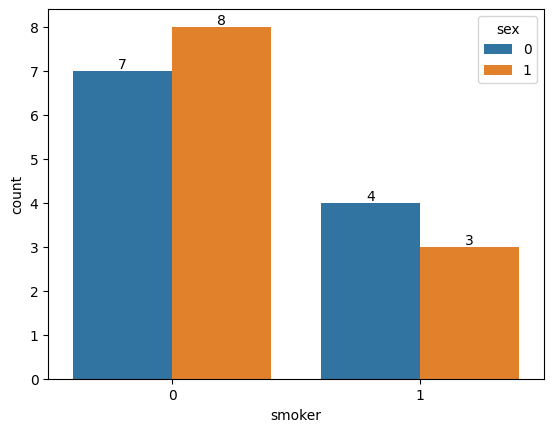

In [ ]:
# understanding the smoking habit of people with maximum age
ax = sns.countplot(x='smoker', hue='sex', data=data[data['age'] == data['age'].max()])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

* Since older people already have higher health risk
* smokers in this age group are the highest risk and are expected to pay the highest insurance charges.”

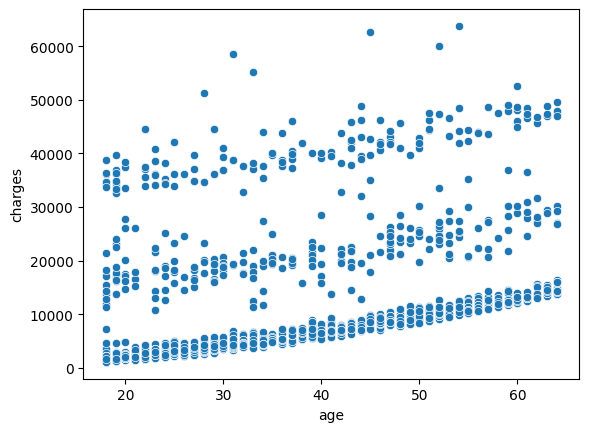

In [ ]:
# understanding the age vs charges
sns.scatterplot(x='age', y='charges', data=data)
plt.show()

* We observe that as age increases, insurance charges generally increase.
* Also, older smokers show much higher charges compared to younger non-smokers.”


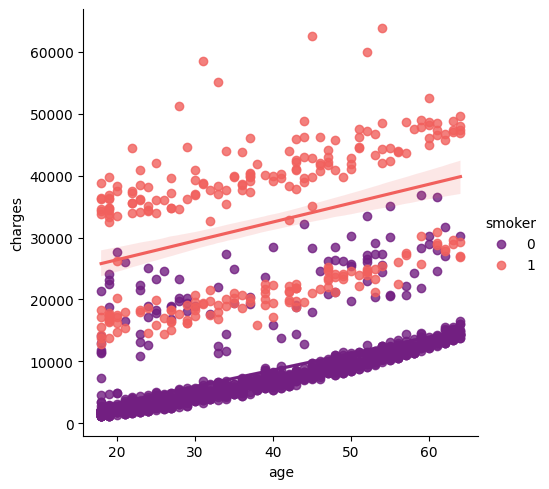

In [ ]:
# smoker vs non-smoker charges
sns.lmplot(x='age', y='charges', hue='smoker', data=data, palette='magma')
plt.show()

* This plot shows age vs insurance charges for smokers and non-smokers separately.
* We observe that for both groups, charges increase with age, but smokers have much higher charges at every age.

<Figure size 1000x600 with 0 Axes>

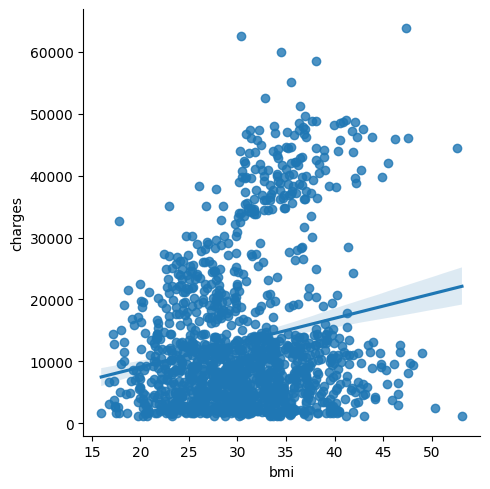

In [ ]:
# correlation of BMI wrt charges
plt.figure(figsize=(10, 6))
sns.lmplot(x='bmi', y='charges', data=data)
plt.show()

* people with higher BMI generally have higher medical risk and hence higher premiums

<Figure size 1000x600 with 0 Axes>

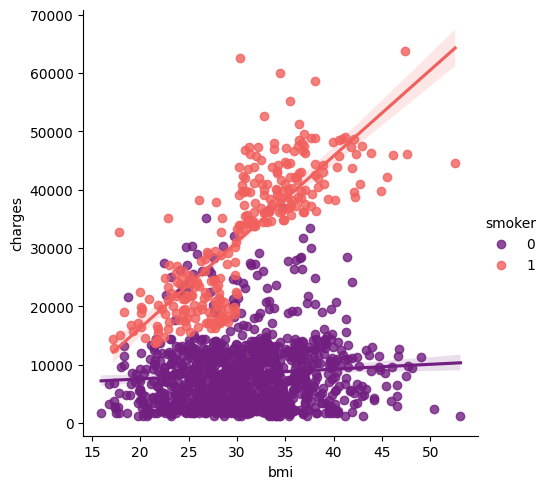

In [ ]:
# correlation of BMI wrt charges and smoking habit
plt.figure(figsize=(10, 6))
sns.lmplot(x='bmi', y='charges', hue='smoker', data=data, palette='magma')
plt.show()

* This plot shows that smokers pay much higher premiums
* BMI increases charges more for Smokers than Non Smokers

# Conclusions


* From the entire analysis, we conclude that smoking is the most important factor affecting insurance premium.
* Age and BMI also have a positive impact, meaning premium increases as age and BMI increase.
* Smokers, especially older people and those with high BMI, pay significantly higher charges.
* Gender and region have relatively smaller impact compared to smoking, age, and BMI.
* So, the model mainly learns risk patterns from smoking habit, age, and BMI to predict insurance premiums accurately.”

# Recomendation

* Make smoking the main factor in premium calculation since it affects cost the most.

* Adjust premiums based on age and BMI because risk increases as age and BMI increase.

* Charge higher premiums for high-risk groups like older smokers with high BMI.

* Encourage healthy habits, especially quitting smoking and maintaining healthy weight, to reduce future claims.

* Focus the prediction model mainly on smoking, age, and BMI for accurate premium calculation.

* *Do* not give too much importance to gender and region since their impact is small.

“I recommend a risk-based pricing approach mainly driven by smoking, age, and BMI, along with promoting healthier lifestyles to reduce long-term costs.”

# Linear Model

In [ ]:
# data sample
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
# dependency split
x = data.drop(['region', 'charges'], axis=1)
y = data[['charges']]

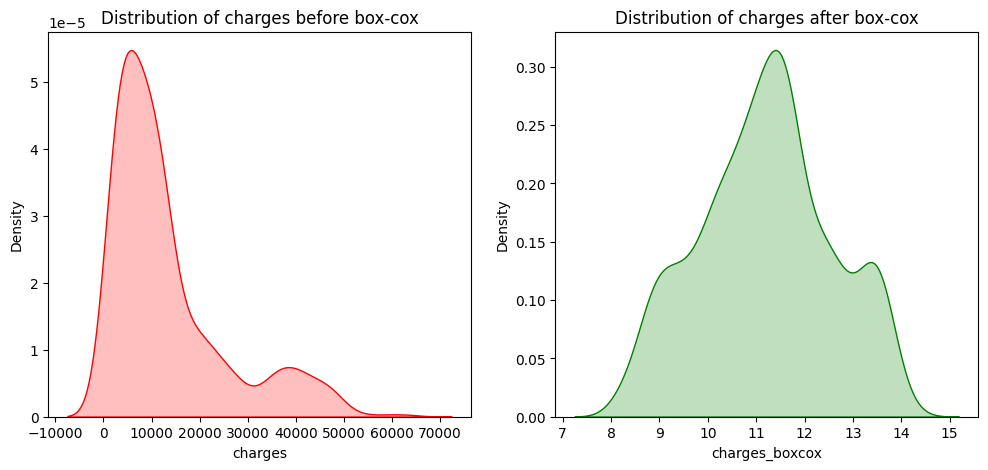

In [ ]:
# understanding the target column
fig = plt.figure(figsize=(12, 5))

# plot before boxcox
ax = fig.add_subplot(121)   # 1 row 2 columns and plot in 1st plot
sns.kdeplot(y['charges'], color='red', fill=True, ax=ax)
ax.set_title('Distribution of charges before box-cox')

# applying boxcox
from scipy.stats import boxcox
y['charges_boxcox'], lmbda = boxcox(y['charges'], )

# plot after boxcox
ax = fig.add_subplot(122)   # 1 row 2 columns and plot in 2nd plot
sns.kdeplot(y['charges_boxcox'], color='green', fill=True, ax=ax)
ax.set_title('Distribution of charges after box-cox')
plt.show()

In [ ]:
# data split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y['charges_boxcox'], test_size=0.2, random_state=42)

# scaling - optional
# from sklearn.preprocessing import StandardScaler

In [ ]:
# simple linear regression
import statsmodels.api as sm

# fit the data
x_train_data = sm.add_constant(x_train)
mlr_model = sm.OLS(y_train, x_train_data).fit()

# summary
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:         charges_boxcox   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     663.3
Date:                Wed, 14 Jan 2026   Prob (F-statistic):          4.94e-324
Time:                        07:04:03   Log-Likelihood:                -1085.6
No. Observations:                1070   AIC:                             2183.
Df Residuals:                    1064   BIC:                             2213.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1211      0.118     68.706      0.0

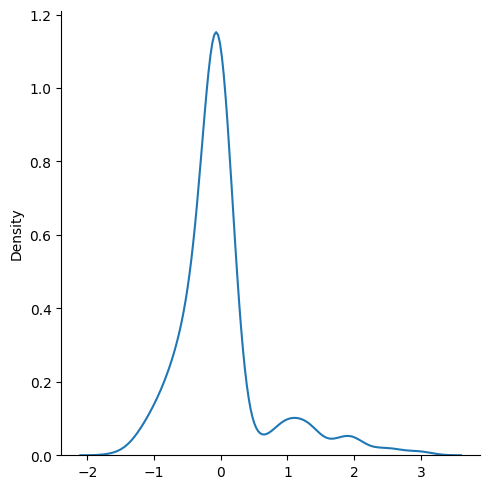

In [ ]:
# residual calculation
y_train_pred = mlr_model.predict(x_train_data)
res = y_train - y_train_pred

# residual plot
sns.displot(res, kind='kde')
plt.show()

In [ ]:
# test prediction

# add constant
x_test_data = sm.add_constant(x_test)

# prediction
y_test_pred = mlr_model.predict(x_test_data)

# testing accuracy
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_test_pred))

0.8009882517855219


In [ ]:
# Linear Equation
# y_pred = (age)*0.0501 + (sex)*-0.1017 + (bmi)*0.0180 + (children)*0.1332 + (smoker)*2.3360

# Random Forest Regressor

* This linear model gives a good baseline, but more complex models like Random Forest can capture non-linear patterns better."

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
rfr_model = rfr(n_estimators=100, criterion='squared_error', random_state=42, n_jobs=-1)
rfr_model.fit(x_train, y_train)
x_train_pred = rfr_model.predict(x_train)
x_test_pred = rfr_model.predict(x_test)

# metrics
print('Training Score:', r2_score(y_train, x_train_pred))
print('Testing Score:', r2_score(y_test, x_test_pred))

Training Score: 0.9647420341485751
Testing Score: 0.8365845174676299


In [ ]:
# feature importance
importances = rfr_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_model.estimators_], axis=0)
std

# home work - map the importances values to the columns.

array([0.02019112, 0.00427197, 0.01355055, 0.01168858, 0.01654732])